**Linear Regression From Scratch**

To get started, let’s simulate some data and look at how the predicted values (Yₑ) differ from the actual value (Y):

In [8]:
import pandas as pd
import numpy as np

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()


,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [9]:
df.columns

Index(['X', 'y'], dtype='object')

To estimate y using the OLS method, we need to calculate xmean and ymean, the covariance of X and y (xycov), and the variance of X (xvar) before we can determine the values for α and β.

In [10]:
xmean = np.mean(df['X'])
ymean = np.mean(df['y'])

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {np.round(alpha,2)}')
print(f'beta = {np.round(beta,2)}')


alpha = 2.0
beta = 0.32


Great, we now have an estimate for alpha and beta! Our model can be written as Yₑ = 2.0 + 0.32X, and we can make predictions:

In [11]:
df.head()

,X,y,xycov,xvar
0,5.910131,4.714615,9.282815,18.152805
1,2.500393,2.076238,-0.391082,0.723985
2,3.946845,2.548811,0.029747,5.277702
3,7.102233,4.615368,11.338948,29.732079
4,6.168895,3.264107,3.291209,20.424750


In [12]:
ypred = alpha + beta*X

In [13]:
len(ypred)

100

In [15]:
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

Let’s plot our prediction ypred against the actual values of y, to get a better visual understanding of our model.

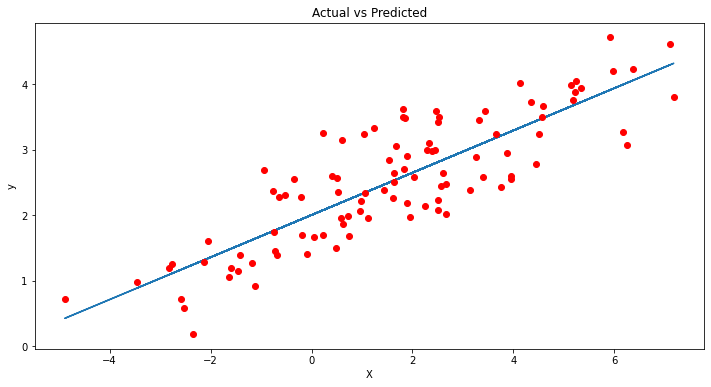

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()


The blue line is our line of best fit, Yₑ = 2.0 + 0.32X. We can see from this graph that there is a positive linear relationship between X and y. Using our model, we can predict y from any values of X!

For example, if we had a value X = 10, we can predict that: Yₑ = 2.0 + 0.32 (10) = 5.2.

**Linear Regression with scikit-learn**


To demonstrate this method, we will be using a very popular advertising dataset about various costs incurred on advertising by different mediums and the sales for a particular product. You can download this dataset here.

We will only be looking at the TV variable in this example — we will explore whether TV advertising spending can predict the number of sales for the product. Let’s start by importing this csv file as a pandas dataframe using read_csv():



In [1]:
import pandas as pd
advert = pd.read_csv("C:\\Users\\Admin\\Desktop\\python\\advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable(target variable) is dependent upon several independent variables.

A regression model involving multiple variables can be represented as: y = b0 + m1b1 + m2b2 + m3b3 + … … mnbn

This is the equation of a hyperplane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.

In [20]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV','Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [28]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9210999124051398
betas = [0.04575482 0.18799423]


In [4]:
model.predict(X)

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

Now that we’ve fit a multiple linear regression model to our data, we can predict sales from any combination of TV and Radio advertising costs! For example, if we wanted to know how many sales we would make if we invested 300 in TV advertising and 200 in Radio advertising… all we have to do is plug in the values!

In [19]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]


**PREDICTION ON WEIGHT AND HEIGHT**

**IMPORT DATASET**

In [2]:
import pandas as pd
dataset = pd.read_csv("C:\\Users\\Admin\\Desktop\\python\\weight-height.csv")

**Analyze Data**

The dataset contains 3 columns namely “Gender”, “Height” and “Weight”.

Height is given in inches and weight in pounds.

**dataset.info():**

This method returns the output below. It basically shows the number of entries, the column names and the column types. Below is the output of the command.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


**dataset.describe():**
        
The describe method displays basic statistical information on the numerical values of the dataset like mean, standard deviation, percentile, min and max.

In [4]:
dataset.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


**dataset.isnull().sum()**


This method is basically used to check if there are any null values in the dataset. This will list number of null values in each column

In [5]:
dataset.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

**Convert Gender to number**


Before we run any machine learning models, we have to convert all categorical values (text values) to numerical values. In our dataset, we can see that we have one field — “Gender” which is categorical. So we have to convert this field into numerical.

The typical way of converting categorical values to numerical is by using the LabelEncoder class to convert Text to Numbers and then using OneHotEncoder to add dummy variables.

But this is useful only if the categorical field contains more than 2 values — for instance, let’s say we have a field called “City” and it contains more than 2 values like “Houston”, “New York” and “San Francisco”.

In this case, we will first use LabelEncoder to convert the cities to numbers like: “Houston” => 0 and “New York” => 1 and “San Francisco” => 2.

Then we will use OneHotEncoder to add 3 dummy variables one for each city. Finally, we will drop one dummy variable to avoid the dummy variable trap.

`The rule of thumb is — if a categorical field has k values then you will need k-1 dummy variables.`

Now in our case, our “Gender” field contains only 2 values — “Male” and “Female”. When we use LabelEncoder, it will convert say “Male” =>0 and “Female” => 1. Since it contains only 2 values, there is no need for us to use OneHotEncoder and add dummy variables. If we use OneHotEncoder, it will end up adding 2 dummy variables but we will end up dropping 1 to avoid the dummy trap. So it makes no sense to do it.

So if a categorical field has 2 values — there are 2 ways for us to do this.

**Use LabelEncoder**

In [7]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender =  LabelEncoder()
X[:,0] = labelEncoder_gender.fit_transform(X[:,0])

In [8]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
y

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [11]:
dataset.shape

(10000, 3)

**Split dataset into training set and test set**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
len(X_train)

8000

In [14]:
len(X_test)

2000

**Fit Regression Model**

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**Predict test set values**

In [16]:
lin_pred = lin_reg.predict(X_test)

**Model Accuracy**

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
print(r2_score(y_test,lin_pred))
print(mean_absolute_error(y_test,lin_pred))
print(mean_squared_error(y_test,lin_pred))

0.9052889824534558
7.955916525326746
97.8715222019616


In [18]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
df

,Actual,Predicted
0,138.085796,141.938288
1,187.363366,176.556588
2,216.533191,219.778362
3,131.761443,148.831884
4,157.718438,162.092076
...,...,...
1995,189.856786,187.365166
1996,202.906859,203.915748
1997,152.420031,149.971296
1998,170.100647,166.833749


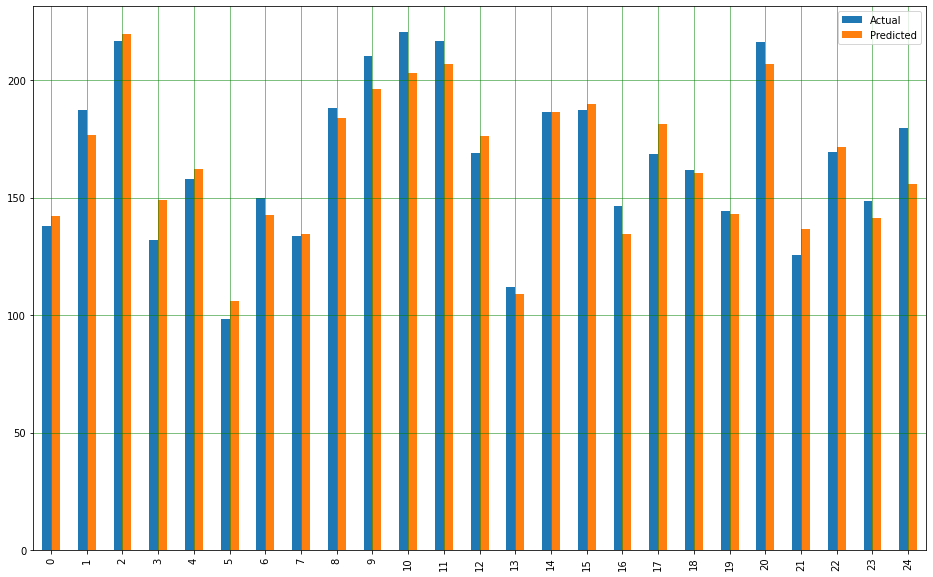

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
X_New = [[ 1., 73.84]]
lin_reg.predict(X_New)

array([215.71799113])